In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import sklearn as sk

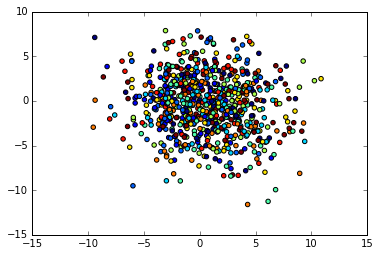

In [2]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
X, y = make_classification(1000, 50, n_informative=30, n_classes=10)
X1, X2, y1, y2 = train_test_split(X, y)
plt.scatter(X1[:,1], X1[:,2],c=y1)

In [3]:
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import GridSearchCV

params = {'alpha': np.arange(1,11)*.1, 
          'loss': ['hinge', 'huber', 'log'], 
          'penalty': ['l2', 'l1', 'elasticnet']}
sgd = GridSearchCV(SGDClassifier(), params)
sgd.fit(X1, y1)
print sgd.best_params_

{'penalty': 'l2', 'alpha': 0.40000000000000002, 'loss': 'log'}


In [4]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform

its = range(100, 1001, 100)
cs = []
for it in its:
    lr = RandomizedSearchCV(LogisticRegression(), {'C': uniform()}, n_iter=it)
    lr.fit(X1, y1)
    print lr.best_params_
    cs.append(lr.best_params_['C'])

{'C': 0.050097435352873365}
{'C': 0.0069580401557870486}
{'C': 0.0016666996312014737}
{'C': 0.0045987979464243711}
{'C': 0.0016096615235575706}
{'C': 0.0091936270604644488}
{'C': 0.0041901003046380669}
{'C': 0.0045193574364534861}
{'C': 0.004479671561181009}
{'C': 0.0062360464178854436}


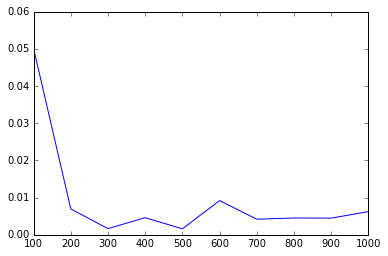

In [5]:
plt.plot(its, cs)

In [6]:
from sklearn.multiclass import OneVsOneClassifier
from sklearn.metrics import accuracy_score
lr = OneVsOneClassifier(LogisticRegression(C=0.003))
lr.fit(X1,y1)
predicted = lr.predict(X2)
print 'Accuracy OVO:', accuracy_score(predicted, y2)

lr = LogisticRegression(C=0.003)
lr.fit(X1,y1)
predicted = lr.predict(X2)
print 'Accuracy OVR:', accuracy_score(predicted, y2)

Accuracy OVO: 0.424
Accuracy OVR: 0.376


In [7]:
from sklearn.naive_bayes import GaussianNB, BernoulliNB

gb = GaussianNB()
gb.fit(X1, y1)
predicted = gb.predict(X2)
print 'Accuracy GaussianNB:', accuracy_score(predicted, y2)


mb = BernoulliNB()
mb.fit(X1, y1)
predicted = mb.predict(X2)
print 'Accuracy BernoulliNB:', accuracy_score(predicted, y2)

Accuracy GaussianNB: 0.356
Accuracy BernoulliNB: 0.284


In [8]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA, QuadraticDiscriminantAnalysis as QDA
import time 

lda = LDA()
start = time.time()
lda.fit(X1, y1)
finish = time.time()
print 'Time to train LDA:', finish - start
start = time.time()
predicted = lda.predict(X2)
finish = time.time()
print 'Time to predict QDA:', finish - start
print 'Accuracy LDA:', accuracy_score(predicted, y2)


qda = QDA()
start = time.time()
qda.fit(X1, y1)
finish = time.time()
print 'Time to train QDA:', finish - start
start = time.time()
predicted = qda.predict(X2)
finish = time.time()
print 'Time to predict QDA:', finish - start
print 'Accuracy QDA:', accuracy_score(predicted, y2)

Time to train LDA: 0.007000207901
Time to predict QDA: 0.0
Accuracy LDA: 0.352
Time to train QDA: 0.0169999599457
Time to predict QDA: 0.00200009346008
Accuracy QDA: 0.464


C:\Users\s.ivanov\AppData\Local\Continuum\Anaconda2\lib\site-packages\sklearn\discriminant_analysis.py:457: UserWarning: The priors do not sum to 1. Renormalizing
  UserWarning)
C:\Users\s.ivanov\AppData\Local\Continuum\Anaconda2\lib\site-packages\sklearn\discriminant_analysis.py:389: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
C:\Users\s.ivanov\AppData\Local\Continuum\Anaconda2\lib\site-packages\sklearn\discriminant_analysis.py:694: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


In [9]:
from sklearn.decomposition import PCA

pca = PCA(n_components=.9)
pca.fit(X1)
print pca.n_components_

25


In [10]:
# try to apply LDA for dimensionality reduction
lda = LDA(n_components=20)
X1red = lda.fit_transform(X1, y1)
lda.fit(X1red, y1)
X2red = lda.transform(X2)
predicted = lda.predict(X2red)
print 'Accuracy LDA after dimensionality reduction:', accuracy_score(predicted, y2)

ValueError: operands could not be broadcast together with shapes (250,50) (9,) 

In [55]:
X, y = make_classification(1000, 50, n_informative=10, n_classes=20)
X1, X2, y1, y2 = train_test_split(X, y)

lda = LDA()
lda.fit(X1, y1)
predicted = lda.predict(X2)
full_accuracy = accuracy_score(y2, predicted)


reduction = LDA(n_components=5)
X1red = reduction.fit_transform(X1, y1)
X2red = reduction.transform(X2)


lda.fit(X1red, y1)
predicted = lda.predict(X2red)
reduced_accuracy = accuracy_score(predicted, y2)

print full_accuracy, reduced_accuracy, reduced_accuracy/full_accuracy

0.132 0.16 1.21212121212


In [53]:
full_accuracy

0.17999999999999999